## Result 8: VSI under different exclusion conditons
Examine VSI under different marker exclusion conditions to assess whether MOD marker transcripts influence VSI:  
- using all transcripts  
- excluding MOD_wm markers  
- excluding MOD_gm markers  
- excluding all MOD markers  

In [43]:
from pathlib import Path

import sys
import os
sys.path.append(os.path.abspath("../src"))

import importlib
import utils
import plot

importlib.reload(utils)
importlib.reload(plot)

from utils import load_merfish_signal_df, load_banksy_result, load_merfish_data, load_boundaries_data
from utils import extract_cell_vsi
from plot import histogram_comparison, plot_vsi_distribution_comparison, plot_normalized_histogram, plot_doublets, CM, SAVE_FIG

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
fig_path = Path("../data/results/R8")

### data

#### Signals in the Tissue Section

In [3]:
MERFISH_data_folder_path = Path("../data/mouse_hypothalamus/MERFISH/")

In [4]:
signal_coordinate_df, coordinate_x_m, coordinate_y_m = load_merfish_signal_df(MERFISH_data_folder_path/"merfish_barcodes_example.csv")

#### Results of Ovrlpy

results:  
- signal integrity  
- signal strength  
- doublets

In [5]:
ovrlpy_result_folder = Path("../data/results/VSI/")
signal_integrity = np.loadtxt(ovrlpy_result_folder/"SignalIntegrity.txt")
signal_strength = np.loadtxt(ovrlpy_result_folder/"SignalStrength.txt")

In [6]:
# exclude MOD marker signals
nonMOD_signal_integrity = np.loadtxt(ovrlpy_result_folder/"SignalIntegrity_exMOD.txt")
nonMOD_signal_strength = np.loadtxt(ovrlpy_result_folder/"SignalStrength_exMOD.txt")

In [8]:
# exclude MOD marker signals
nonMOD_wm_signal_integrity = np.loadtxt(ovrlpy_result_folder/"SignalIntegrity_exMOD_wm.txt")
nonMOD_wm_signal_strength = np.loadtxt(ovrlpy_result_folder/"SignalStrength_exMOD_wm.txt")

In [9]:
# exclude MOD marker signals
nonMOD_gm_signal_integrity = np.loadtxt(ovrlpy_result_folder/"SignalIntegrity_exMOD_gm.txt")
nonMOD_gm_signal_strength = np.loadtxt(ovrlpy_result_folder/"SignalStrength_exMOD_gm.txt")

In [10]:
# doublets
doublets_all = pd.read_csv(ovrlpy_result_folder/"doublets_df.csv")
doublets_exMOD = pd.read_csv(ovrlpy_result_folder/"doublets_exMOD_df.csv")
doublets_exMOD_wm = pd.read_csv(ovrlpy_result_folder/"doublets_exMOD_wm_df.csv")
doublets_exMOD_gm = pd.read_csv(ovrlpy_result_folder/"doublets_exMOD_gm_df.csv")

#### Results of BANKSY

In [11]:
banksy_folder_path = Path("../data/banksy_results/")

In [12]:
banksy_result = load_banksy_result(banksy_folder_path/"banksy_cluster.txt", coordinate_x_m, coordinate_y_m)

#### Segmentation Dataset

In [13]:
merfish_data = load_merfish_data(MERFISH_data_folder_path / "merfish_all_cells.csv", 
                                 banksy_result, coordinate_x_m, coordinate_y_m, 
                                 animal_id=1, bregma_value=-0.24)

#### Cell boundaries

In [14]:
boundaries_df = load_boundaries_data(MERFISH_data_folder_path/'cellboundaries_example_animal.csv', 
                                     merfish_data, coordinate_x_m, coordinate_y_m)

#### Marker Genes

differentially expressed genes identified by BANKSY

In [15]:
# all differentially expressed genes
DE_genes = ['Mlc1', 'Dgkk', 'Cbln2', 'Syt4', 'Gad1', 'Plin3', 'Gnrh1', 'Sln', 'Gjc3', 'Mbp', 'Lpar1', 'Trh', 'Ucn3', 'Cck']
# DE_genes_MOD_gm
DE_genes_MOD_gm = ['Mlc1', 'Dgkk', 'Cbln2', 'Syt4', 'Gad1', 'Plin3', 'Gnrh1', 'Sln', 'Gjc3']
# DE_genes_MOD_wm
DE_genes_MOD_wm = ['Mbp', 'Lpar1', 'Trh', 'Ucn3', 'Cck']

In [16]:
MOD_boundaries = boundaries_df[(boundaries_df['banksy'] == 7) | (boundaries_df['banksy'] == 8)]
MOD_wm_boundaries = boundaries_df[boundaries_df['banksy'] == 7]
MOD_gm_boundaries = boundaries_df[boundaries_df['banksy'] == 8]

### VSI under Exclusive Conditions

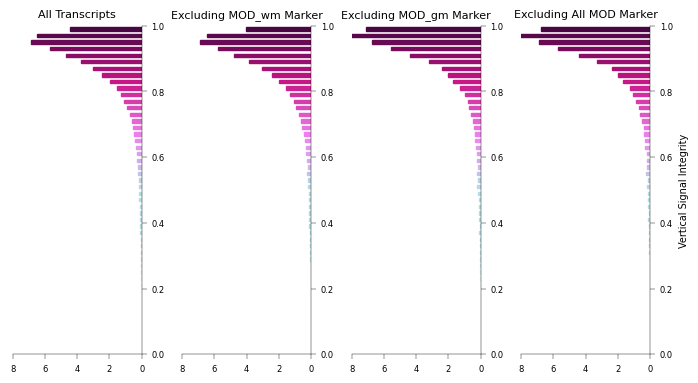

In [17]:
histogram_comparison(signal_integrity, signal_strength, 
                     nonMOD_wm_signal_integrity, nonMOD_wm_signal_strength, 
                     nonMOD_gm_signal_integrity, nonMOD_gm_signal_strength, 
                     nonMOD_signal_integrity, nonMOD_signal_strength, 
                     signal_threshold=3, xlim=(0,8), log=False)

In [18]:
cell_si, cell_ss = extract_cell_vsi(boundary_df=boundaries_df, integrity=signal_integrity, strength=signal_strength, integrity_size=1800)
cell_si_nonMOD_wm, cell_ss_nonMOD_wm = extract_cell_vsi(boundary_df=boundaries_df, integrity=nonMOD_wm_signal_integrity, strength=nonMOD_wm_signal_strength, integrity_size=1800)
cell_si_nonMOD_gm, cell_ss_nonMOD_gm = extract_cell_vsi(boundary_df=boundaries_df, integrity=nonMOD_gm_signal_integrity, strength=nonMOD_gm_signal_strength, integrity_size=1800)
cell_si_nonMOD, cell_ss_nonMOD = extract_cell_vsi(boundary_df=boundaries_df, integrity=nonMOD_signal_integrity, strength=nonMOD_signal_strength, integrity_size=1800)

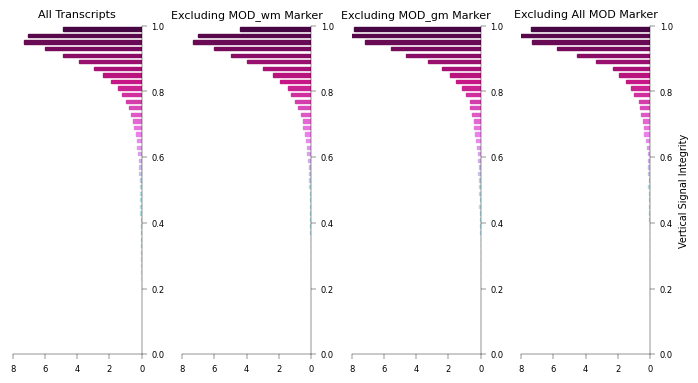

In [19]:
histogram_comparison(cell_si, cell_ss, 
                     cell_si_nonMOD_wm, cell_ss_nonMOD_wm, 
                     cell_si_nonMOD_gm, cell_ss_nonMOD_gm,
                     cell_si_nonMOD, cell_ss_nonMOD, 
                     signal_threshold=3, xlim=(0,8), log=False, 
                     save_dir = fig_path/"exVSIcell.png")

In [20]:
MOD_si, MOD_ss = extract_cell_vsi(boundary_df=MOD_boundaries, integrity=signal_integrity, strength=signal_strength, integrity_size=1800)
MOD_si_nonMOD_wm, MOD_ss_nonMOD_wm = extract_cell_vsi(boundary_df=MOD_boundaries, integrity=nonMOD_wm_signal_integrity, strength=nonMOD_wm_signal_strength, integrity_size=1800)
MOD_si_nonMOD_gm, MOD_ss_nonMOD_gm = extract_cell_vsi(boundary_df=MOD_boundaries, integrity=nonMOD_gm_signal_integrity, strength=nonMOD_gm_signal_strength, integrity_size=1800)
MOD_si_nonMOD, MOD_ss_nonMOD = extract_cell_vsi(boundary_df=MOD_boundaries, integrity=nonMOD_signal_integrity, strength=nonMOD_signal_strength, integrity_size=1800)

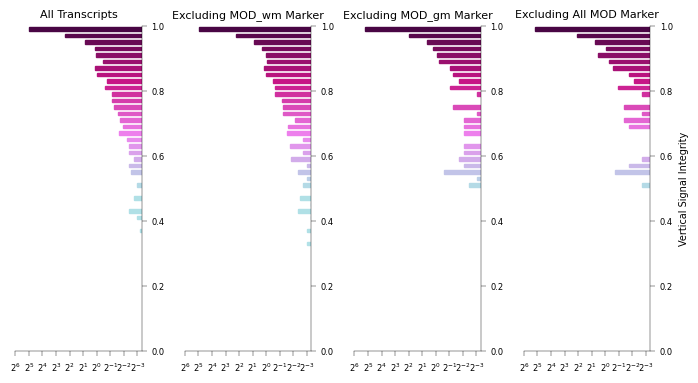

In [21]:
histogram_comparison(MOD_si, MOD_ss, 
                     MOD_si_nonMOD_wm, MOD_ss_nonMOD_wm, 
                     MOD_si_nonMOD_gm, MOD_ss_nonMOD_gm,
                     MOD_si_nonMOD, MOD_ss_nonMOD, 
                     signal_threshold=3, xlim=(1e-1,64), log=True, 
                     save_dir = fig_path/"exVSIMOD.png")

In [22]:
MOD_wm_si, MOD_wm_ss = extract_cell_vsi(boundary_df=MOD_wm_boundaries, integrity=signal_integrity, strength=signal_strength, integrity_size=1800)
MOD_wm_si_nonMOD_wm, MOD_wm_ss_nonMOD_wm = extract_cell_vsi(boundary_df=MOD_wm_boundaries, integrity=nonMOD_wm_signal_integrity, strength=nonMOD_wm_signal_strength, integrity_size=1800)
MOD_wm_si_nonMOD_gm, MOD_wm_ss_nonMOD_gm = extract_cell_vsi(boundary_df=MOD_wm_boundaries, integrity=nonMOD_gm_signal_integrity, strength=nonMOD_gm_signal_strength, integrity_size=1800)
MOD_wm_si_nonMOD, MOD_wm_ss_nonMOD = extract_cell_vsi(boundary_df=MOD_wm_boundaries, integrity=nonMOD_signal_integrity, strength=nonMOD_signal_strength, integrity_size=1800)

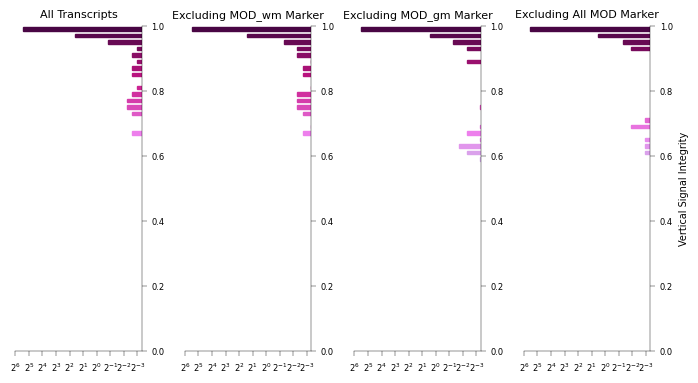

In [23]:
histogram_comparison(MOD_wm_si, MOD_wm_ss, 
                     MOD_wm_si_nonMOD_wm, MOD_wm_ss_nonMOD_wm, 
                     MOD_wm_si_nonMOD_gm, MOD_wm_ss_nonMOD_gm,
                     MOD_wm_si_nonMOD, MOD_wm_ss_nonMOD, 
                     signal_threshold=3, xlim=(1e-1,64), log=True,
                     save_dir = fig_path/"exVSIMOD_wm.png")

In [24]:
MOD_gm_si, MOD_gm_ss = extract_cell_vsi(boundary_df=MOD_gm_boundaries, integrity=signal_integrity, strength=signal_strength, integrity_size=1800)
MOD_gm_si_nonMOD_wm, MOD_gm_ss_nonMOD_wm = extract_cell_vsi(boundary_df=MOD_gm_boundaries, integrity=nonMOD_wm_signal_integrity, strength=nonMOD_wm_signal_strength, integrity_size=1800)
MOD_gm_si_nonMOD_gm, MOD_gm_ss_nonMOD_gm = extract_cell_vsi(boundary_df=MOD_gm_boundaries, integrity=nonMOD_gm_signal_integrity, strength=nonMOD_gm_signal_strength, integrity_size=1800)
MOD_gm_si_nonMOD, MOD_gm_ss_nonMOD = extract_cell_vsi(boundary_df=MOD_gm_boundaries, integrity=nonMOD_signal_integrity, strength=nonMOD_signal_strength, integrity_size=1800)

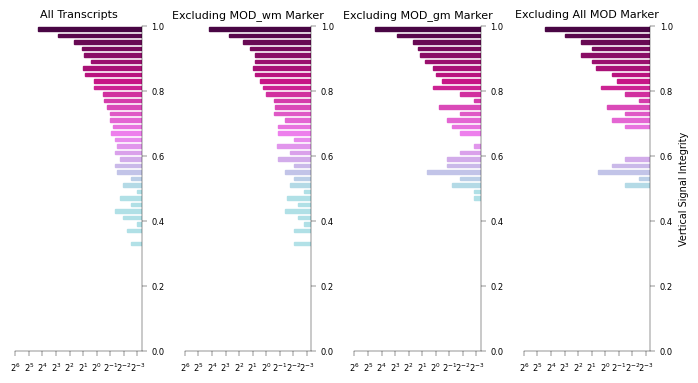

In [25]:
histogram_comparison(MOD_gm_si, MOD_gm_ss, 
                     MOD_gm_si_nonMOD_wm, MOD_gm_ss_nonMOD_wm, 
                     MOD_gm_si_nonMOD_gm, MOD_gm_ss_nonMOD_gm,
                     MOD_gm_si_nonMOD, MOD_gm_ss_nonMOD, 
                     signal_threshold=3, xlim=(1e-1,64), log=True,
                     save_dir = fig_path/"exVSIMOD_gm.png")

### normalized hist: MOD_gm/MOD_wm

#### exclusive distribution: MOD_wm and MOD_gm

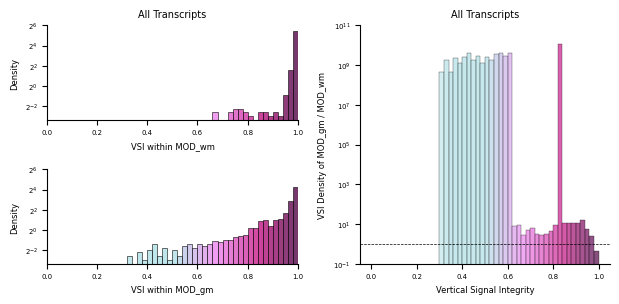

In [36]:
fig = plt.figure(figsize=(16*CM, 8*CM))
gs = gridspec.GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])

vals1, bins1, vals2, bins2 = plot_vsi_distribution_comparison(
    cell_integrity_1=MOD_wm_si,
    cell_strength_1=MOD_wm_ss,
    cell_integrity_2=MOD_gm_si,
    cell_strength_2=MOD_gm_ss,
    title="All Transcripts",
    signal_threshold=3.0,
    ylim=(1e-1,64),
    figure_height=8*CM,
    ax=[ax1,ax2]
)

plot_normalized_histogram(vals1, vals2, bins=bins1, epsilon=1e-10, title = "All Transcripts", ylim=(1e-1, 10**11), ax=ax3)

plt.tight_layout()
plt.savefig(fig_path/"MODsVSIall.pdf", **SAVE_FIG)
plt.show()

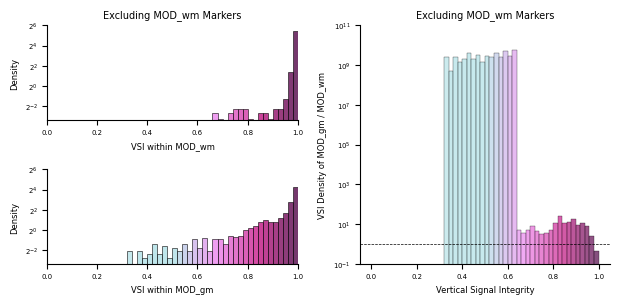

In [39]:
fig = plt.figure(figsize=(16*CM, 8*CM))
gs = gridspec.GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])

vals1, bins1, vals2, bins2 = plot_vsi_distribution_comparison(
    cell_integrity_1=MOD_wm_si_nonMOD_wm,
    cell_strength_1=MOD_wm_ss_nonMOD_wm,
    cell_integrity_2=MOD_gm_si_nonMOD_wm,
    cell_strength_2=MOD_gm_ss_nonMOD_wm,
    title="Excluding MOD_wm Markers",
    signal_threshold=3.0,
    ylim=(1e-1,64),
    figure_height=8*CM,
    ax=[ax1,ax2]
)

plot_normalized_histogram(vals1, vals2, bins=bins1, epsilon=1e-10, title = "Excluding MOD_wm Markers", ylim=(1e-1, 10**11), ax=ax3)

plt.tight_layout()
plt.savefig(fig_path/"MODsVSIexMODwm.pdf", **SAVE_FIG)
plt.show()

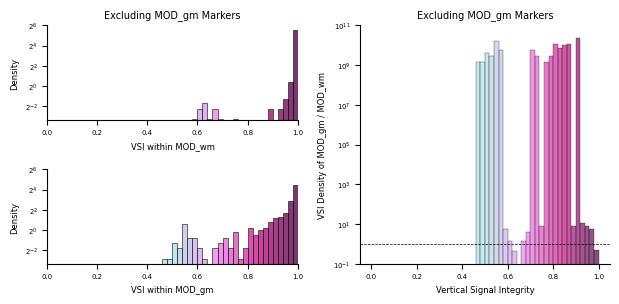

In [40]:
fig = plt.figure(figsize=(16*CM, 8*CM))
gs = gridspec.GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])

vals1, bins1, vals2, bins2 = plot_vsi_distribution_comparison(
    cell_integrity_1=MOD_wm_si_nonMOD_gm,
    cell_strength_1=MOD_wm_ss_nonMOD_gm,
    cell_integrity_2=MOD_gm_si_nonMOD_gm,
    cell_strength_2=MOD_gm_ss_nonMOD_gm,
    title="Excluding MOD_gm Markers",
    signal_threshold=3.0,
    ylim=(1e-1,64),
    figure_height=8*CM,
    ax=[ax1,ax2]
)

plot_normalized_histogram(vals1, vals2, bins=bins1, epsilon=1e-10, title = "Excluding MOD_gm Markers", ylim=(1e-1, 10**11), ax=ax3)

plt.tight_layout()
plt.savefig(fig_path/"MODsVSIexMODgm.pdf", **SAVE_FIG)
plt.show()

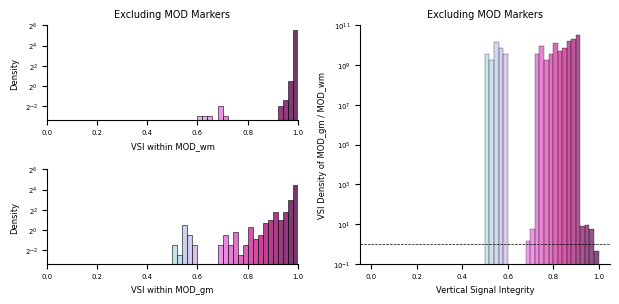

In [41]:
fig = plt.figure(figsize=(16*CM, 8*CM))
gs = gridspec.GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])

vals1, bins1, vals2, bins2 = plot_vsi_distribution_comparison(
    cell_integrity_1=MOD_wm_si_nonMOD,
    cell_strength_1=MOD_wm_ss_nonMOD,
    cell_integrity_2=MOD_gm_si_nonMOD,
    cell_strength_2=MOD_gm_ss_nonMOD,
    title="Excluding MOD Markers",
    signal_threshold=3.0,
    ylim=(1e-1,64),
    figure_height=8*CM,
    ax=[ax1,ax2]
)

plot_normalized_histogram(vals1, vals2, bins=bins1, epsilon=1e-10, title = "Excluding MOD Markers", ylim=(1e-1, 10**11), ax=ax3)

plt.tight_layout()
plt.savefig(fig_path/"MODsVSIexMOD.pdf", **SAVE_FIG)
plt.show()